In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import collections
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from ipywidgets import Image
from io import StringIO
import pydotplus #pip install pydotplus

Dataset UCI Adult: classify people using demographical data - whether they earn more than $50,000 per year or not.

- **Age** – continuous feature
- **Workclass** –  continuous feature
- **fnlwgt** – final weight of object, continuous feature
- **Education** –  categorical feature
- **Education_Num** – number of years of education, continuous feature
- **Martial_Status** –  categorical feature
- **Occupation** –  categorical feature
- **Relationship** – categorical feature
- **Race** – categorical feature
- **Sex** – categorical feature
- **Capital_Gain** – continuous feature
- **Capital_Loss** – continuous feature
- **Hours_per_week** – continuous feature
- **Country** – categorical feature

**1-Скачали датасет и загрузили его в фрейм данных**

In [2]:
data = pd.read_csv("/content/adult.data.csv")
data.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


**2-Смотрим статичтическую информацию о данных**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**4 - Смотрим название колонок. Строки мы посмотрели, вызвав метод .head() выше**

In [5]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [6]:
data.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


**5 - Сначала визуализируем данные**

Визуализируем только количественные признаки

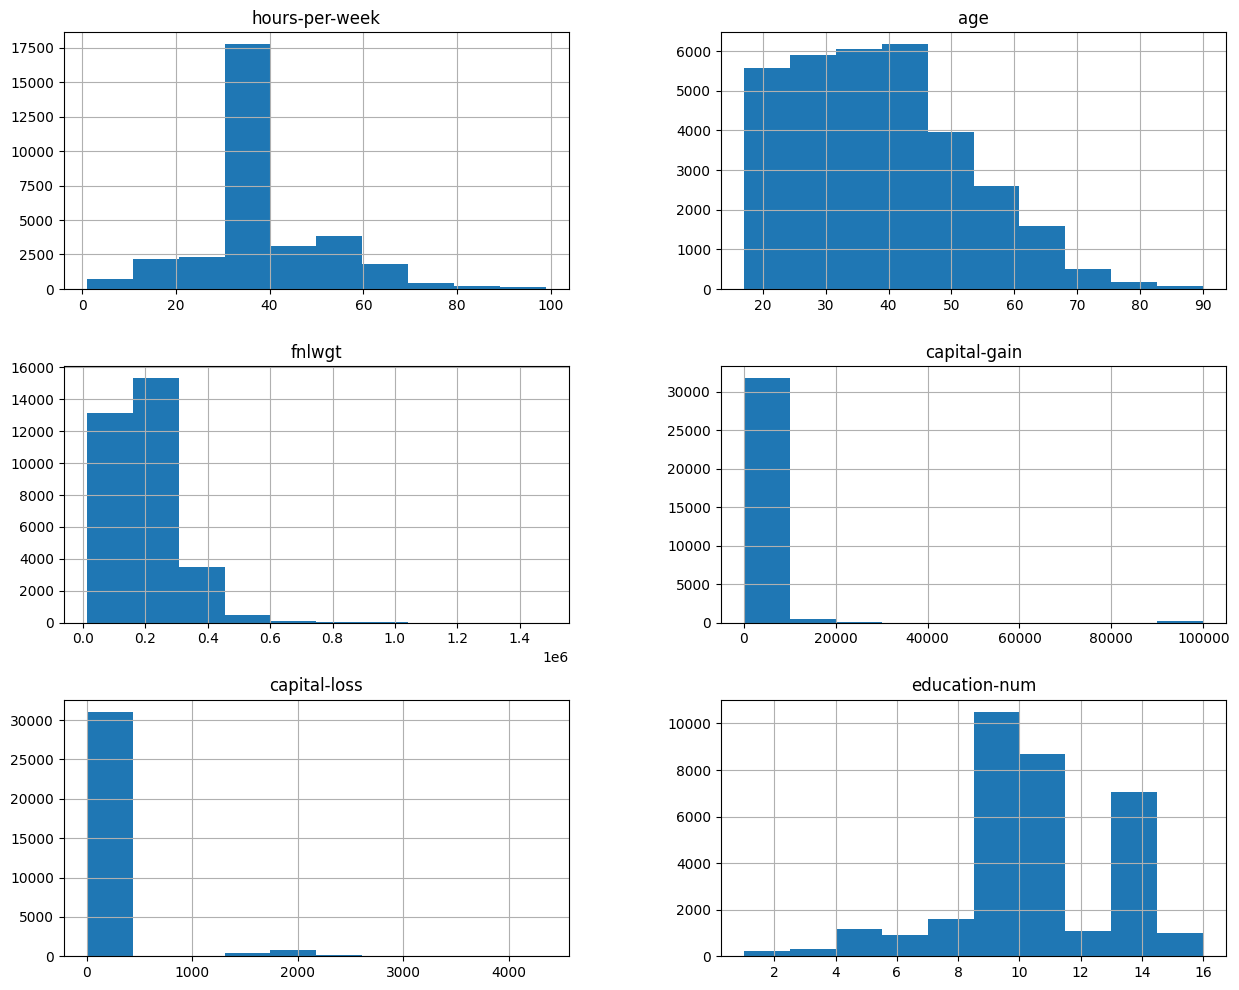

In [30]:
#numerical_columns
features1 = list(set(data.columns) - set(['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'salary']))

data[features1].hist(figsize=(15,12));

Визуализируем только категориальные признаки

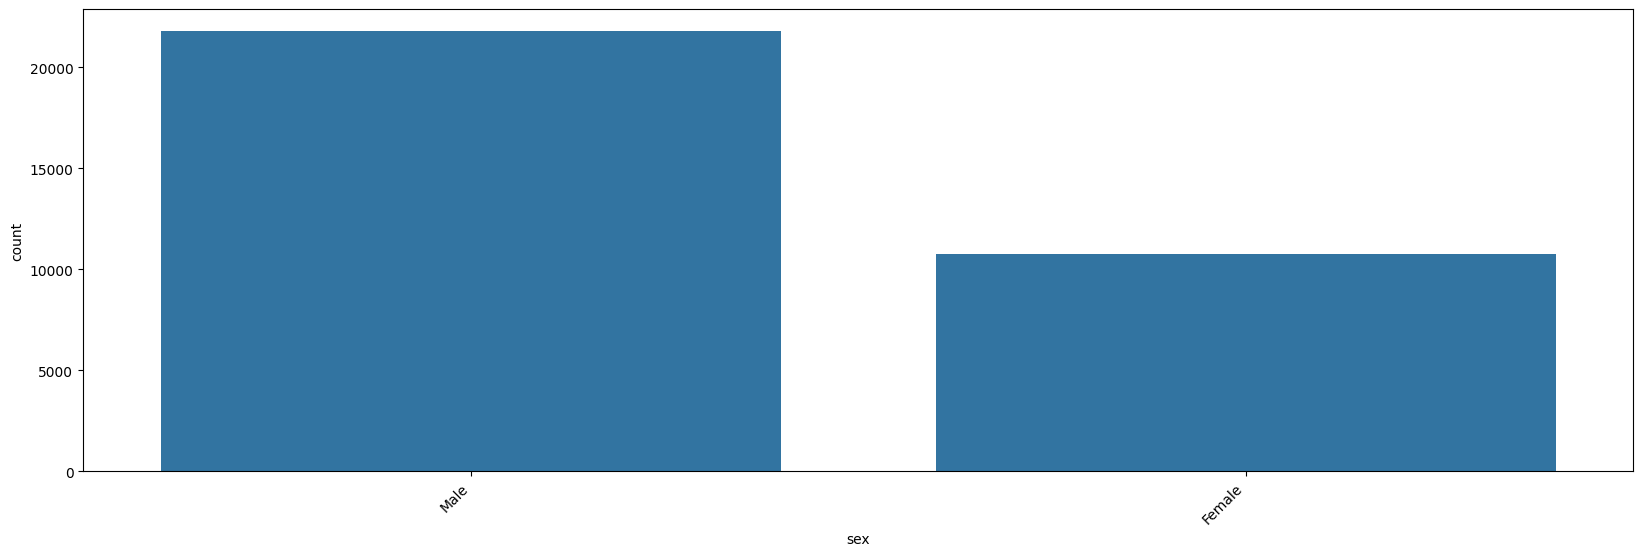

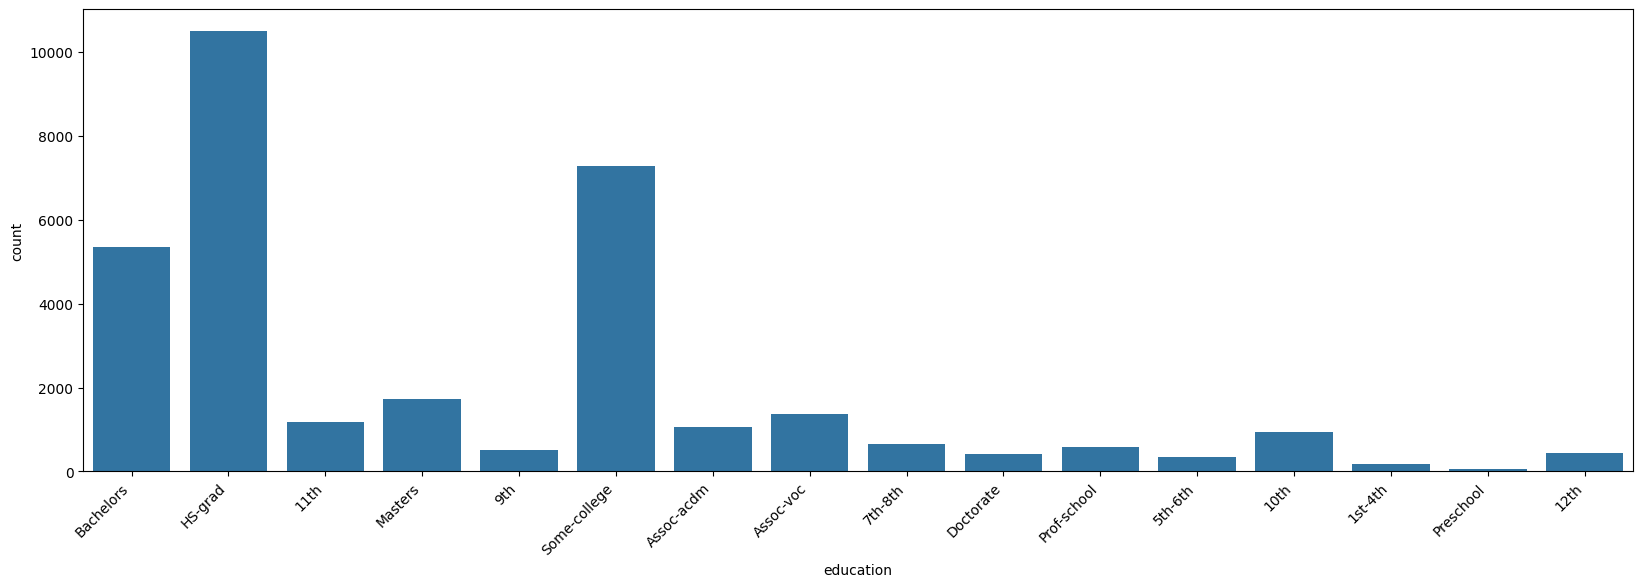

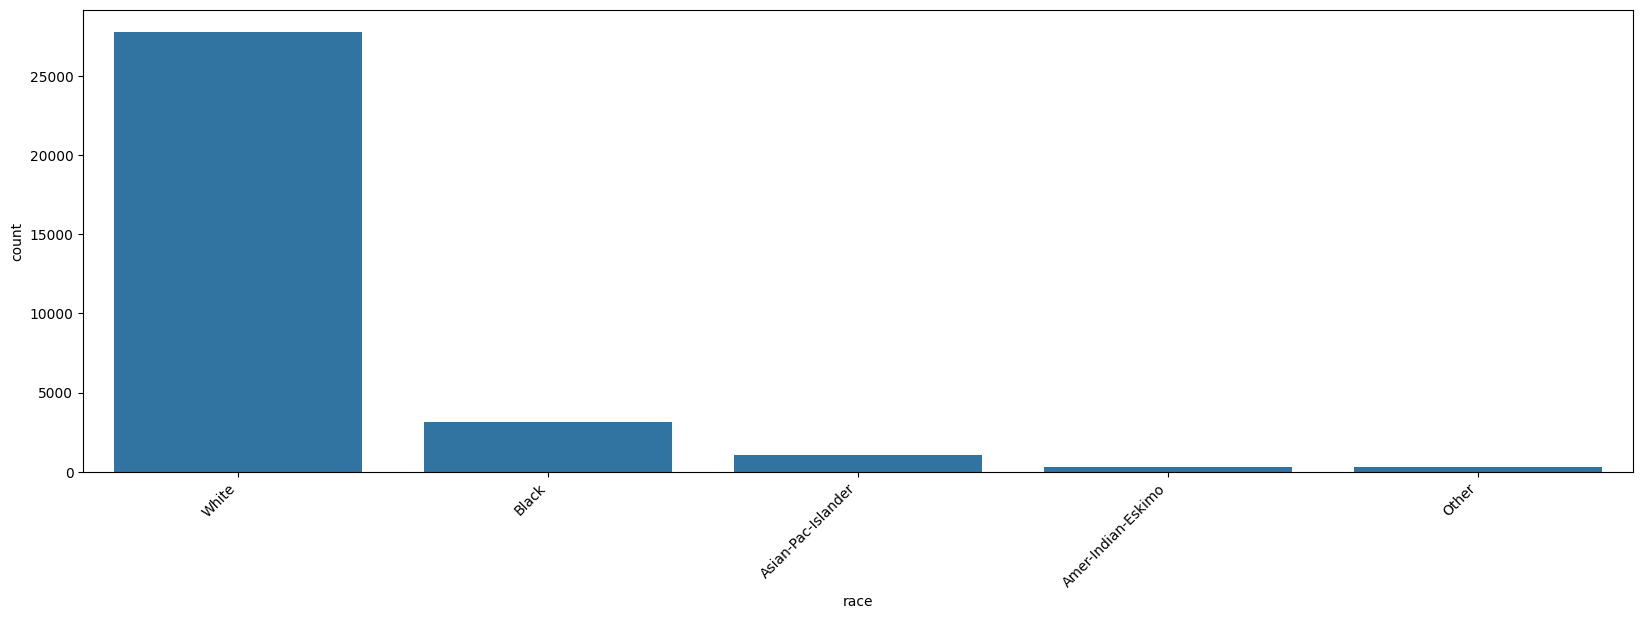

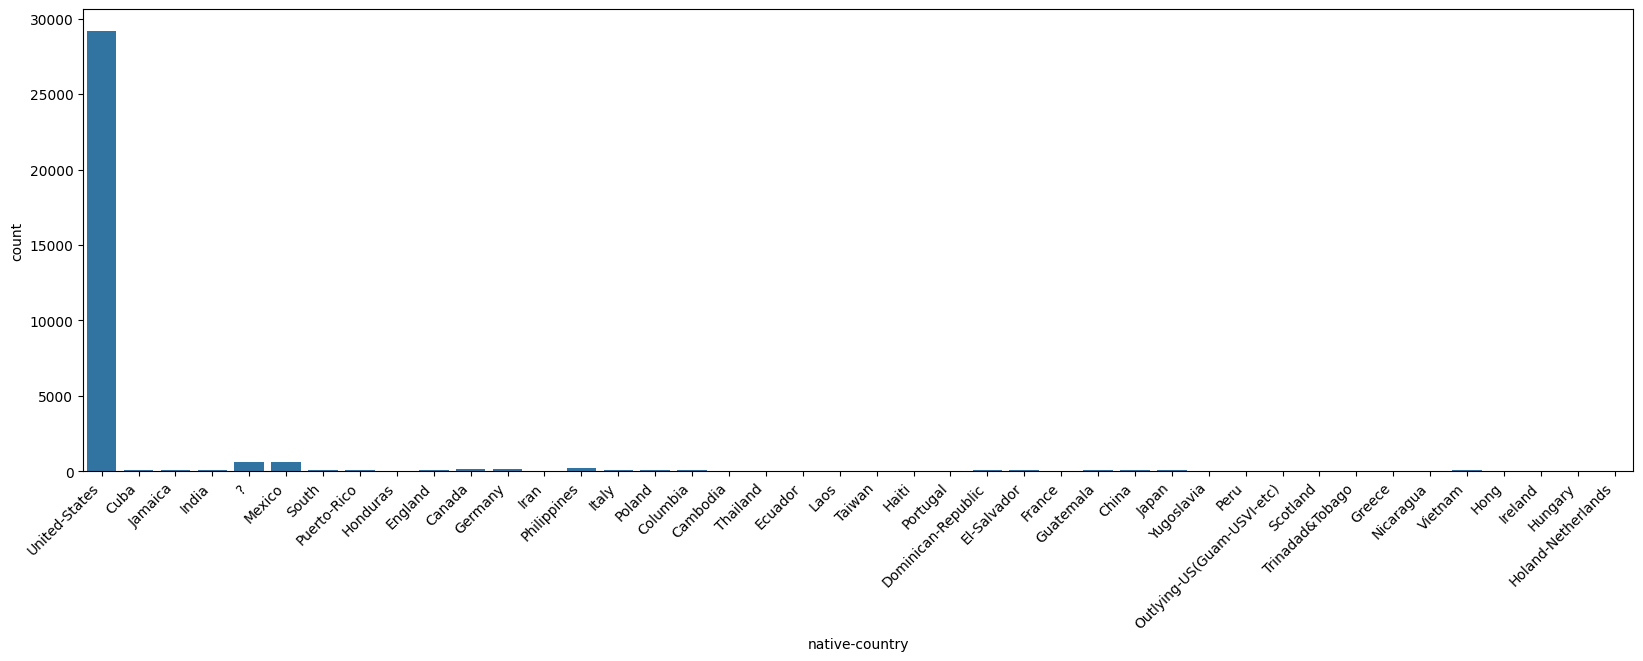

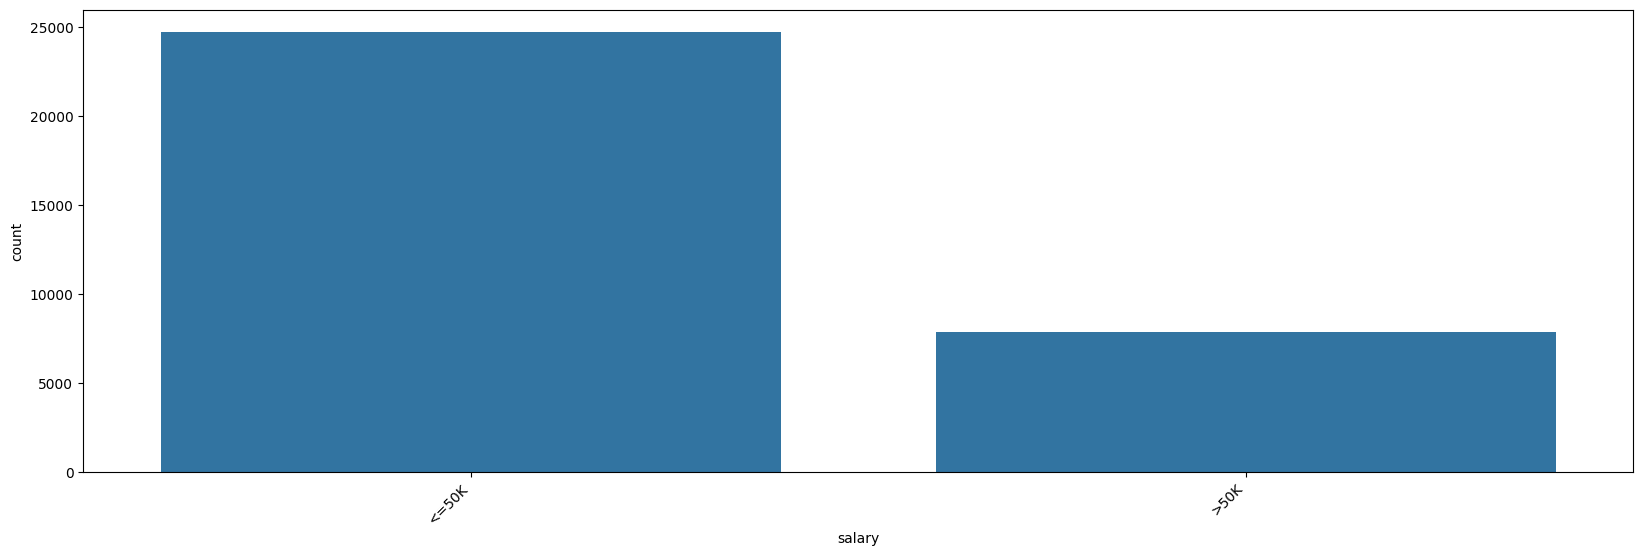

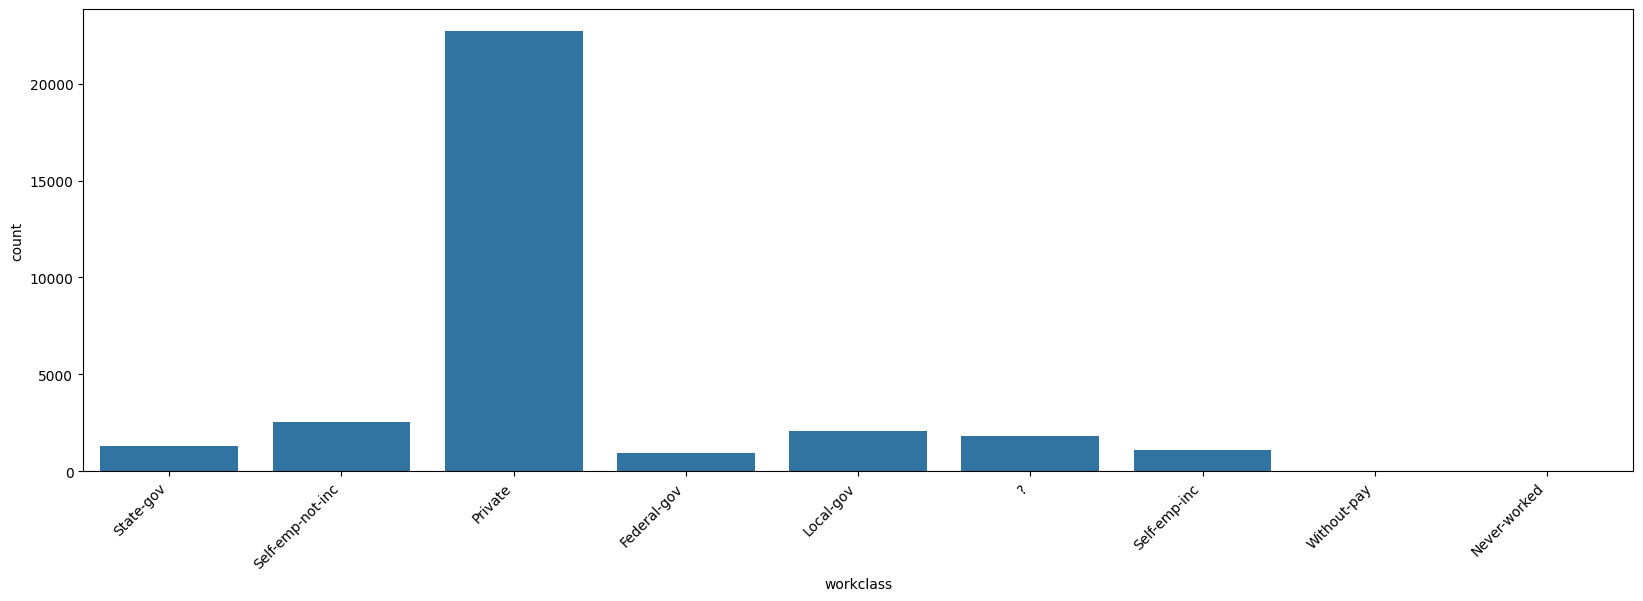

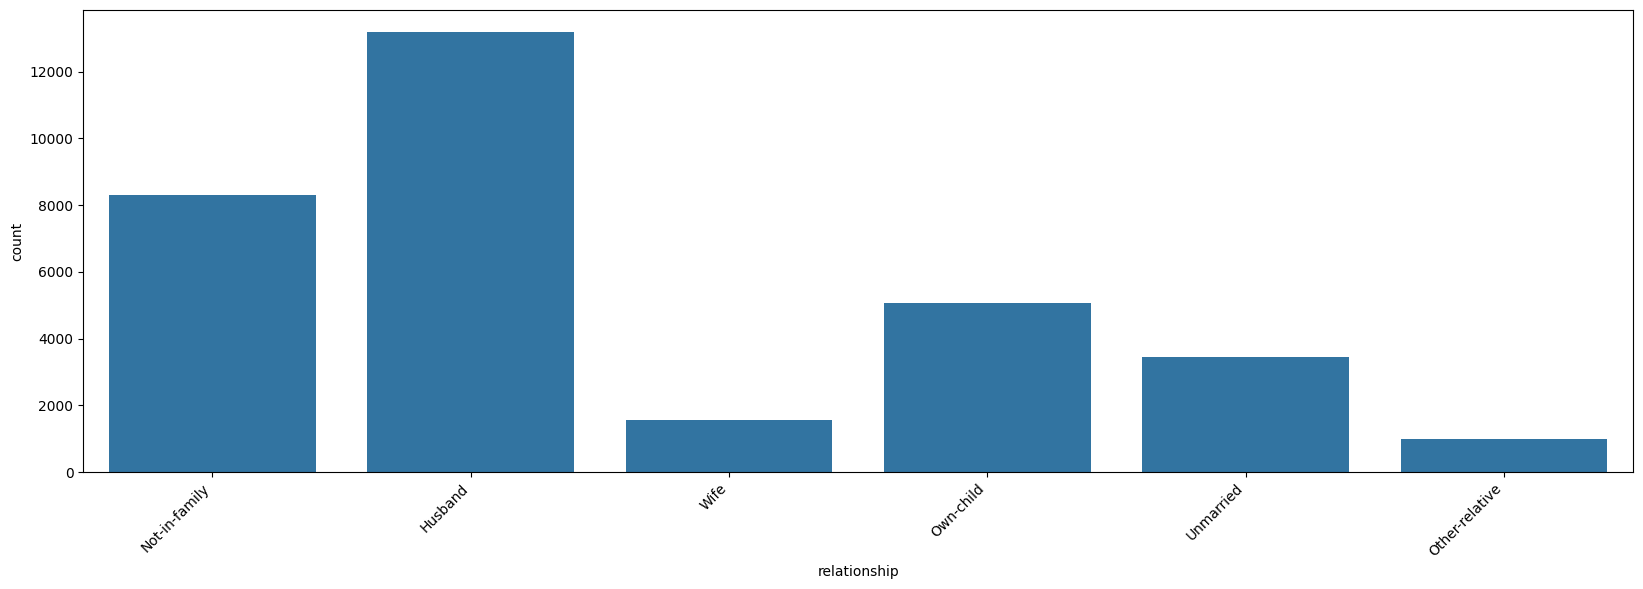

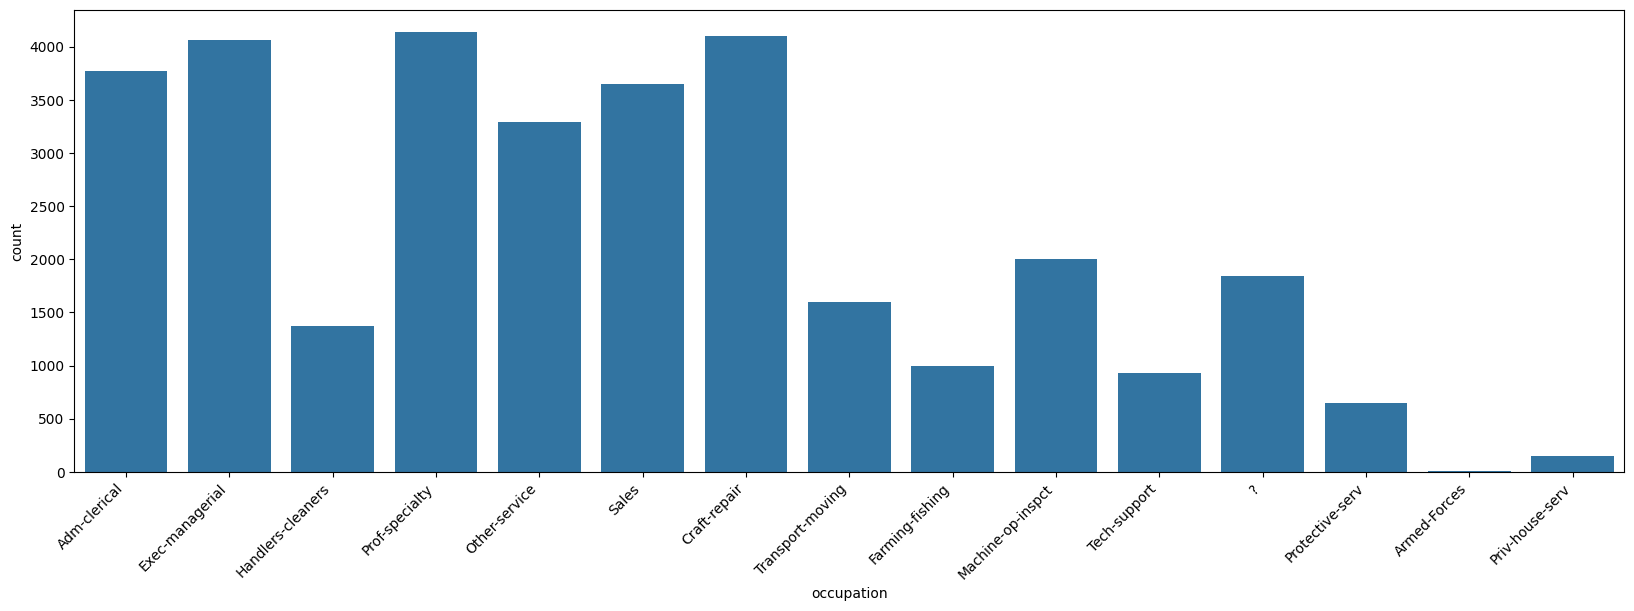

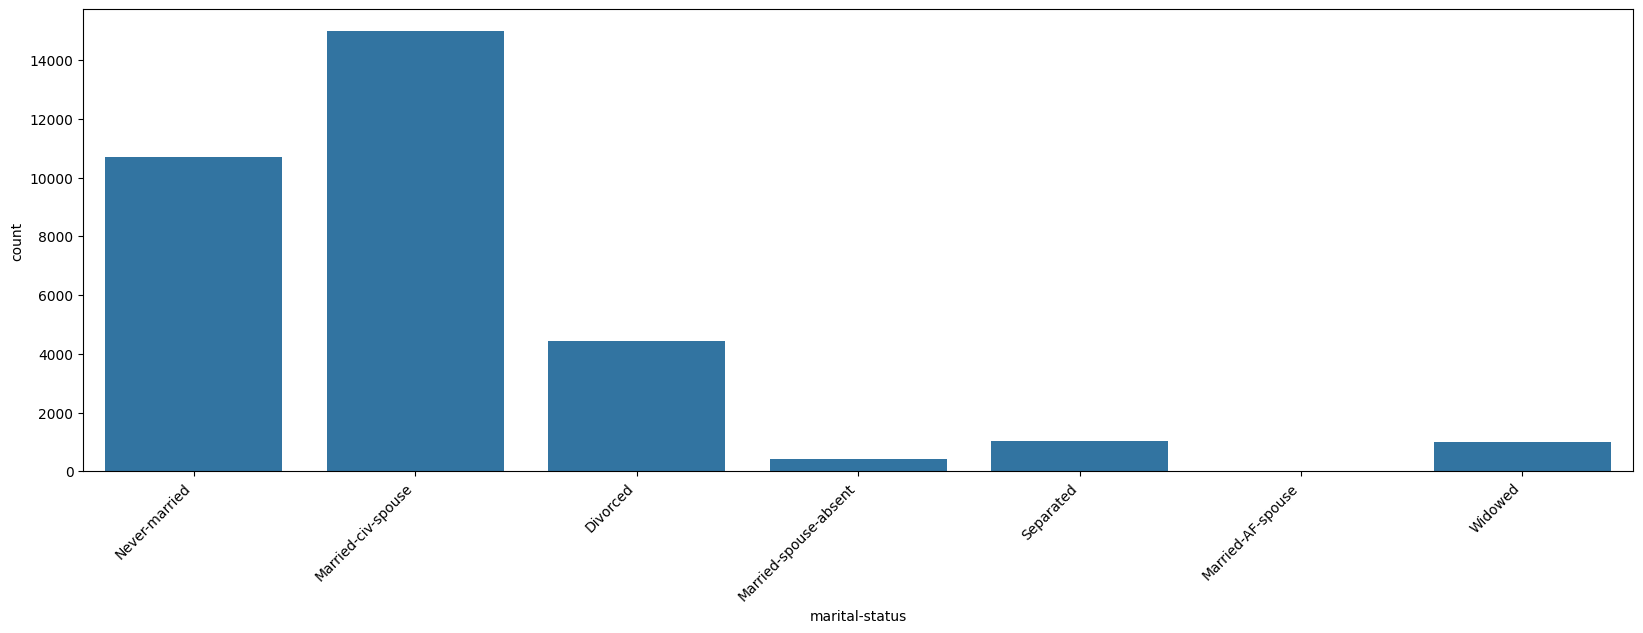

In [34]:
#categorical_columns
features2 = list(set(data.columns) - set(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']))

for feature in features2:
    plt.figure(figsize=(20, 6))
    sns.countplot(x=data[feature])
    plt.xticks(rotation=45, ha='right')


Посмотрим, есть ли связь между зарплатой и образованием

<Axes: xlabel='salary', ylabel='count'>

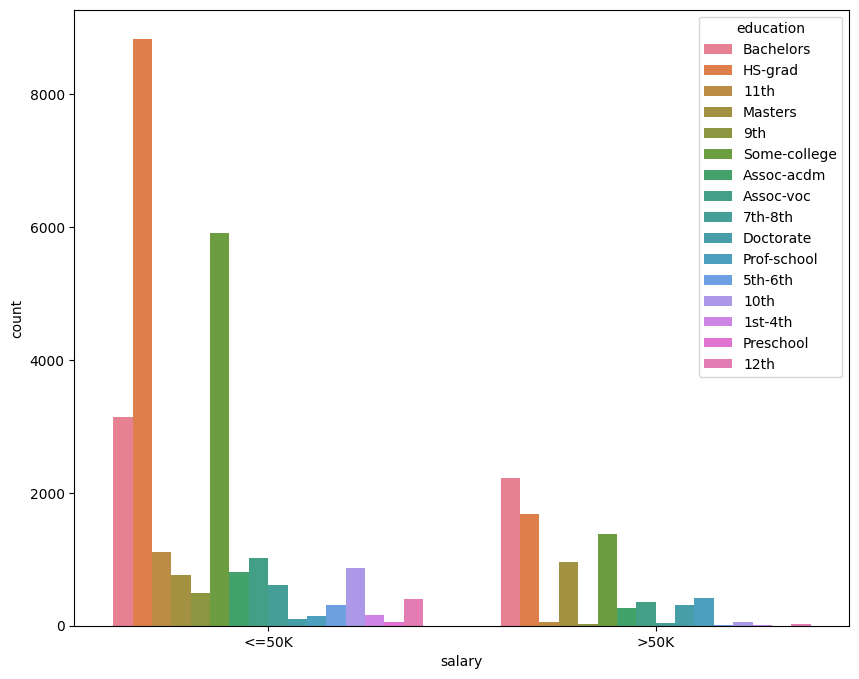

In [35]:
sns.countplot(data=data, x="salary", hue='education')

Посмотрим, в каком семейном положении люди с зп>50K и зп<=50К

<Axes: xlabel='salary', ylabel='Count'>

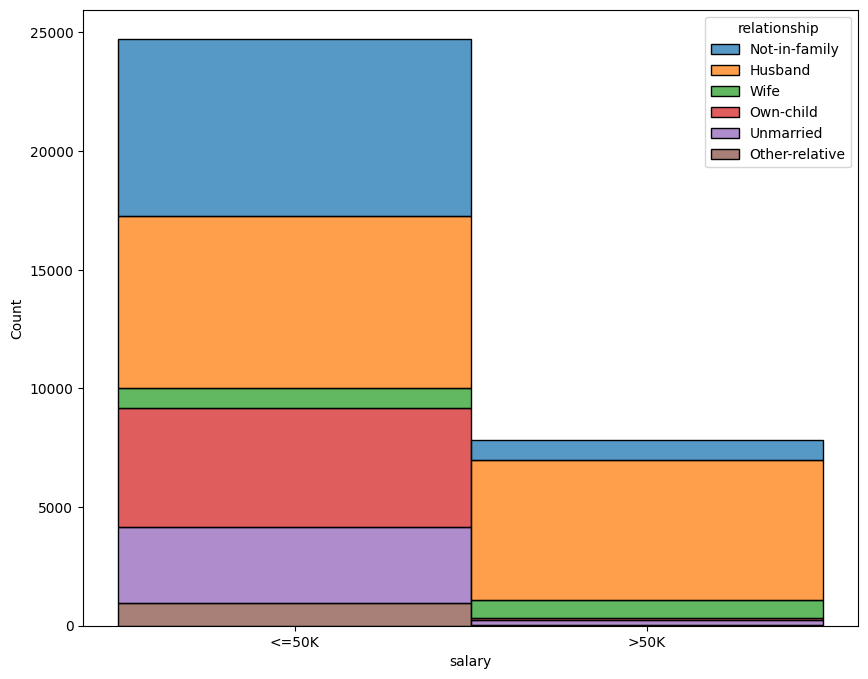

In [37]:
sns.histplot(data, x="salary", hue="relationship", multiple="stack")

Посмотрим ящик с усами(возраст, зарплата), чтобы определить количество выбросов

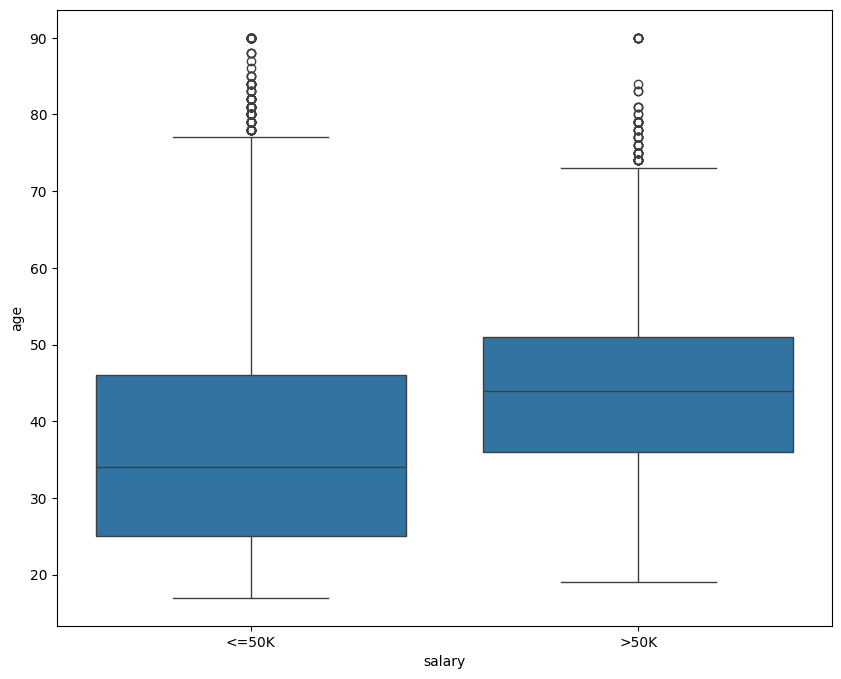

In [38]:
sns.boxplot(data=data, y='age', x='salary');

Почти то же, что и ящик с усами

<Axes: xlabel='salary', ylabel='age'>

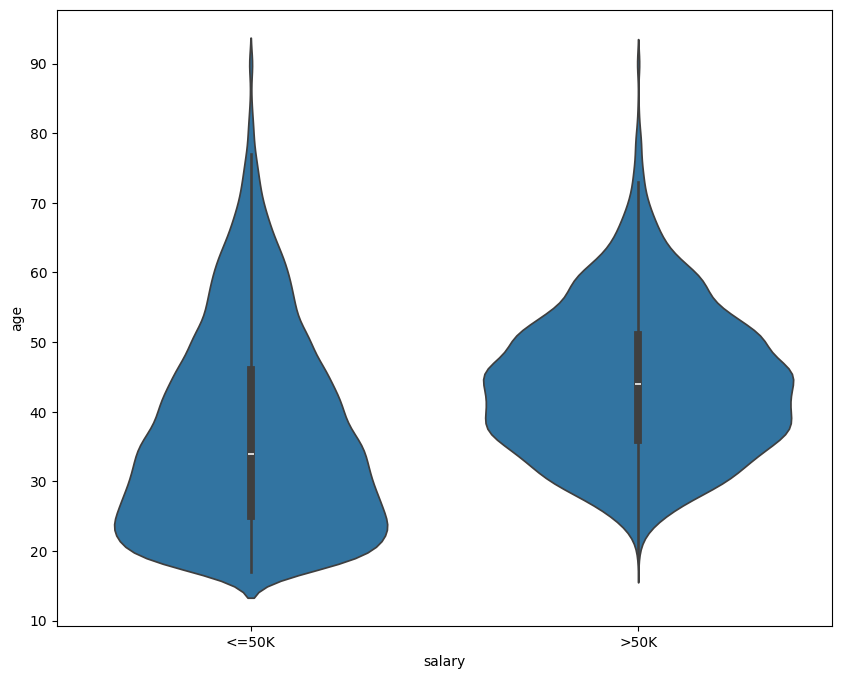

In [44]:
sns.violinplot(x='salary', y='age', data=data)

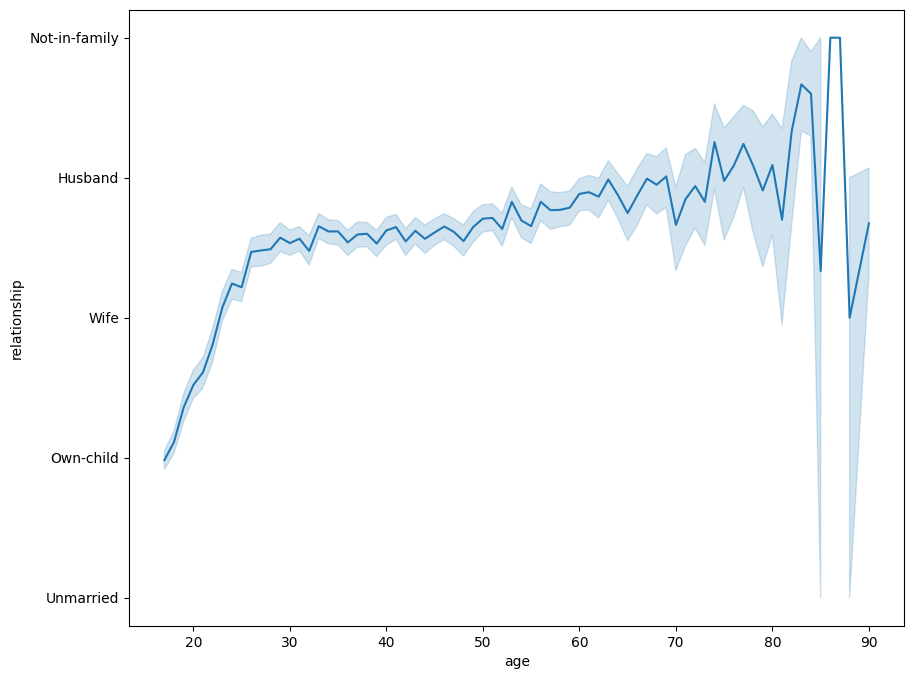

In [39]:
sns.lineplot(data=data, x='age', y='relationship');

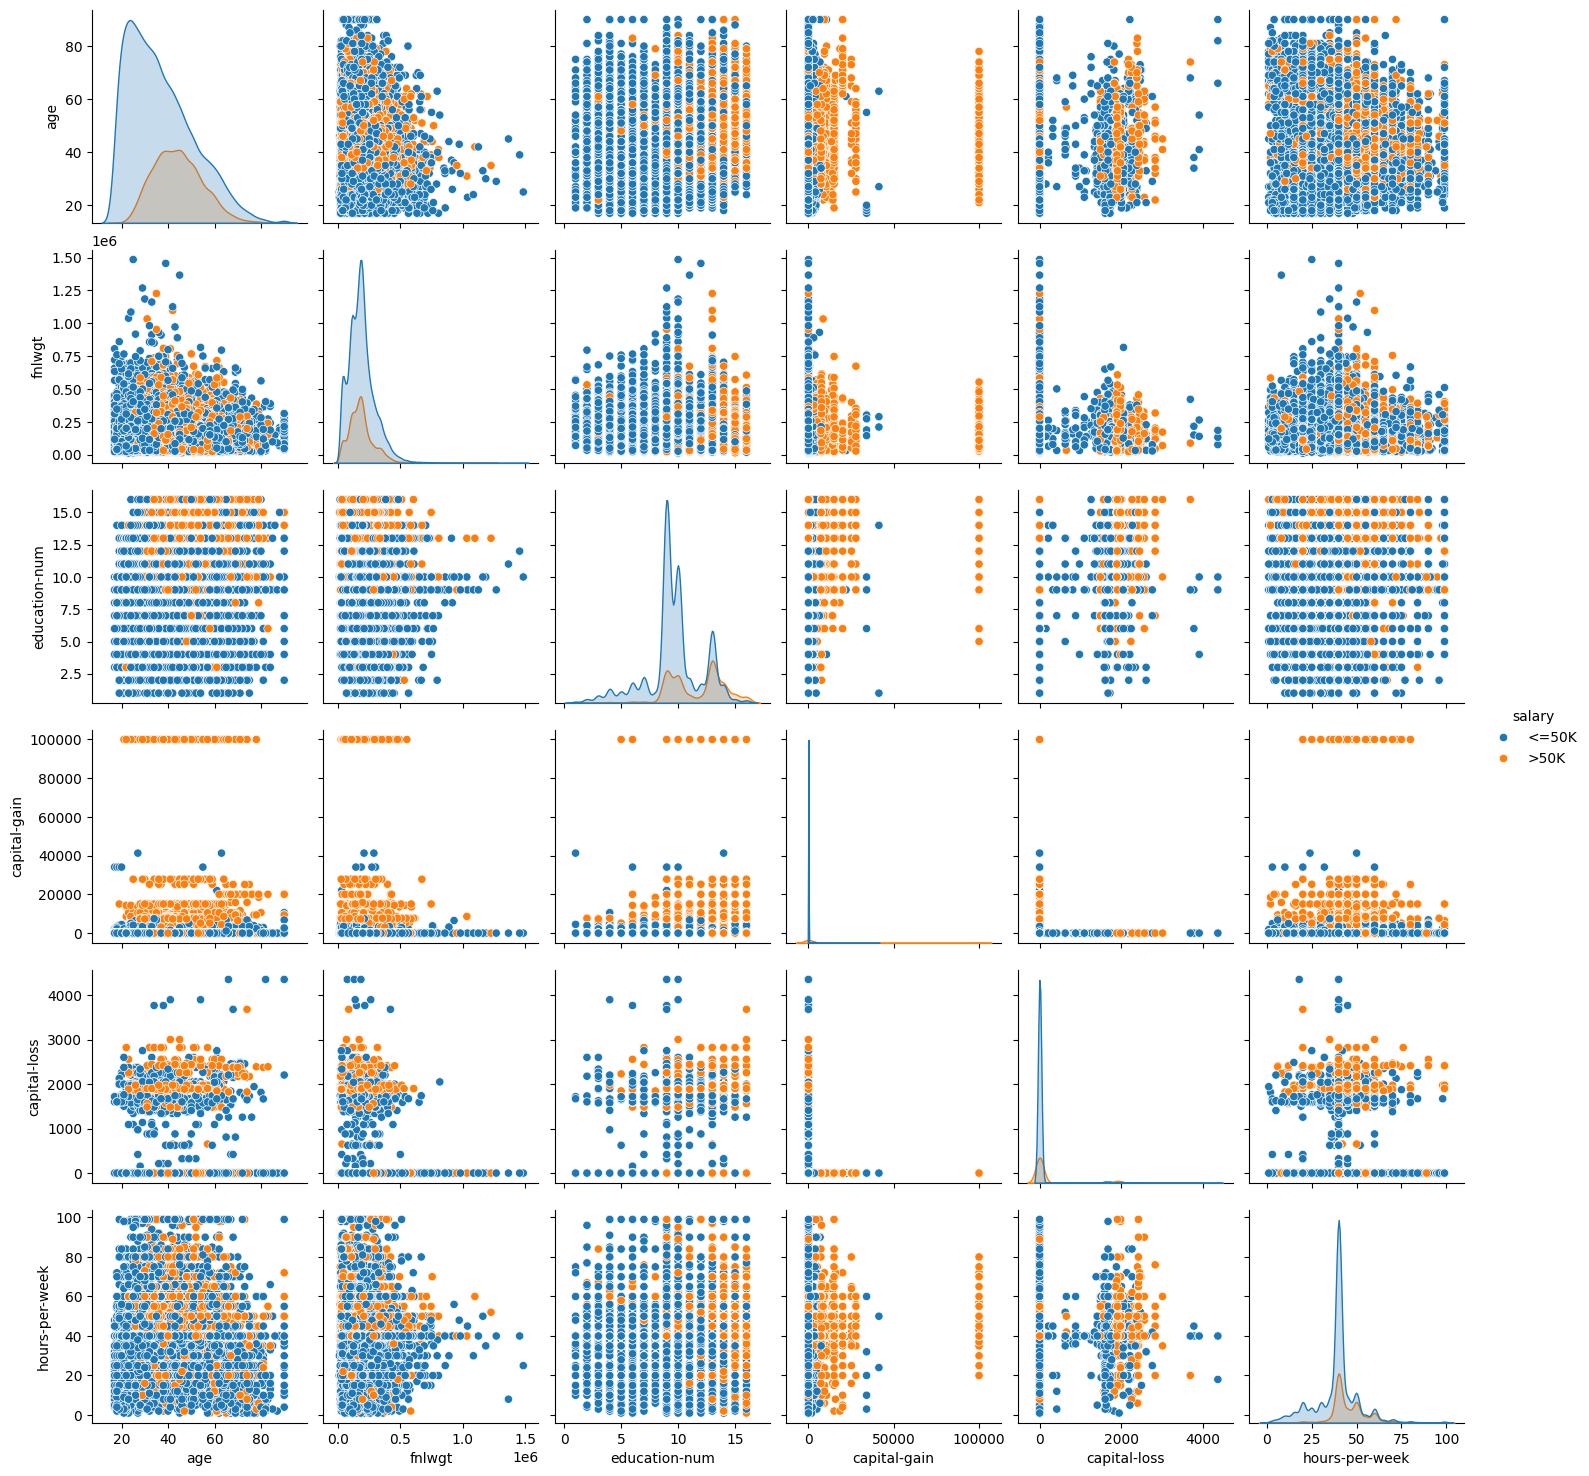

In [40]:
sns.pairplot(data, kind="scatter", hue="salary");

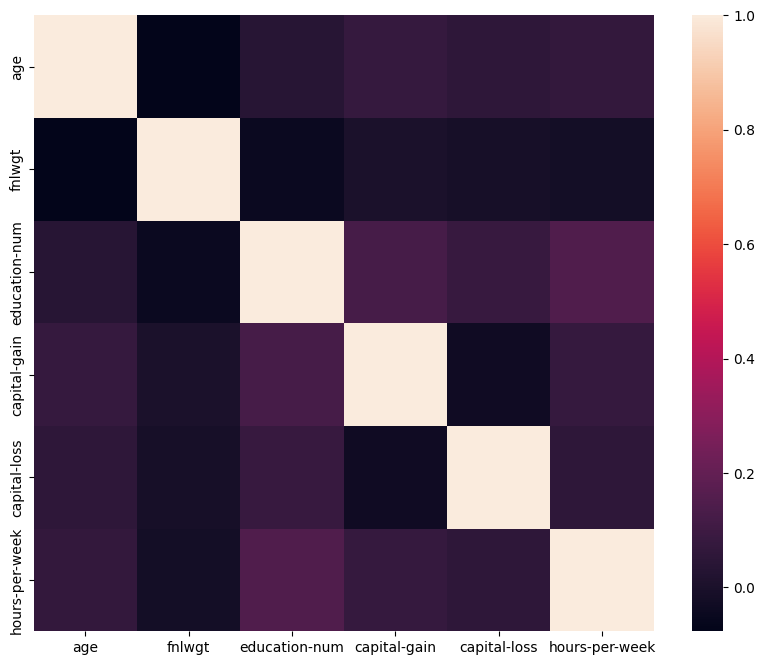

In [43]:
sns.heatmap(data.corr(numeric_only = True));

In [ ]:
# это для след лабы
# data.loc[data["salary"] == " <=50K", "salary"] = 0
# data.loc[data["salary"] == " >50K", "salary"] = 1
# y = data.pop('salary')

Заменим категориальные данные количественными. Сначала делаем проверку и записываем

In [45]:
categorical_columns = [
    c for c in data.columns if data[c].dtype.name == "object"
]
numerical_columns = [
    c for c in data.columns if data[c].dtype.name != "object"
]

print("categorical_columns:", categorical_columns)
print("numerical_columns:", numerical_columns)

categorical_columns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'salary']
numerical_columns: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


Применим get_dummies

In [46]:
df = pd.concat(
    [data[numerical_columns], pd.get_dummies(data[categorical_columns])],
    axis=1,
)

In [47]:
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,salary_<=50K,salary_>50K
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,38,215646,9,0,0,40,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
3,53,234721,7,0,0,40,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,28,338409,13,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
